In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import skopt
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
import lightgbm as lgb
from xgboost import XGBClassifier,plot_importance
from sklearn.model_selection import StratifiedKFold
from sklearn import linear_model, decomposition, datasets
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from google.colab import files
from sklearn.ensemble import VotingClassifier
from skopt import BayesSearchCV


# Remove warnings
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [55]:
pip install scikit-optimize

In [0]:
train_url = "https://raw.githubusercontent.com/rroy1212/DSL_Kaggle_Competition/master/train_final.csv"

In [0]:
test_url = "https://raw.githubusercontent.com/rroy1212/DSL_Kaggle_Competition/master/test_final.csv"


In [0]:
train_df = pd.read_csv(train_url)
test_df = pd.read_csv(test_url)

In [60]:
train_df.shape
print("The training set has:", str(train_df.shape[0]) , "rows and", train_df.shape[1], "columns")
test_df.shape
print("The training set has:", str(test_df.shape[0]) , "rows and", test_df.shape[1], "columns")

The training set has: 16383 rows and 26 columns
The training set has: 16385 rows and 25 columns


Data Exploration:

1. Check the type of data present in the test and training data, if we have any categorical variables then we may use Label Encoder or One Hot Encoder

2. Check if we have any missing values

3. Find correlation between variables

4. Check distribution of variables with respect to target variable

5. Outlier Detection

In [61]:
test_df.head()

,Id,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24
0,16384,37733,1,1.77,118603,1,0,118602,118097,1,0,1,1,117888,2.453740,13881,117941,117887,1,117885,1,1,1,1,1
1,16385,312129,1,3.54,118052,1,0,117961,290919,1,4,1,43,118322,-0.012317,14638,118992,290919,1,118321,1,1,1,7,1
2,16386,24884,1,23.01,118300,1,0,117961,302830,1,0,1,1,128231,1.000000,770,119181,4673,1,128230,1,1,1,14,1
3,16387,4674,1,1.77,119091,1,0,119062,118036,1,9,1,1,117908,1.000000,16752,143531,290919,1,117905,1,1,1,81,1
4,16388,68725,1,3.54,118300,1,0,117961,171056,1,0,1,6,118639,-0.503250,4945,118360,118638,1,118636,1,1,1,1,1


In [0]:
train_df.head()

,Id,Y,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24
0,1,1,25884,1,33.63,118596,1,0,118595,125738,1,3,1,2,121374,-2.266430,1945,118450,119184,1,121372,1,1,1,2,1
1,2,1,34346,1,10.62,118041,1,0,117902,130913,1,1,1,23,118943,-0.305612,15385,117945,292795,1,259173,1,1,1,1,1
2,3,1,34923,1,1.77,118327,1,0,117961,124402,1,2,1,1,118786,2.015561,7547,118933,290919,1,118784,1,1,1,1,1
3,4,1,80926,1,30.09,118300,1,0,117961,301218,1,0,1,1,118332,-3.172501,4933,118458,118331,1,307024,1,1,1,2,1
4,5,1,4674,1,1.77,119921,1,0,119920,302830,1,0,1,2,128231,0.573767,13836,142145,4673,1,128230,1,1,1,620,1


In [0]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16383 entries, 0 to 16382
Data columns (total 26 columns):
Id     16383 non-null int64
Y      16383 non-null int64
f1     16383 non-null int64
f2     16383 non-null int64
f3     16383 non-null float64
f4     16383 non-null int64
f5     16383 non-null int64
f6     16383 non-null int64
f7     16383 non-null int64
f8     16383 non-null int64
f9     16383 non-null int64
f10    16383 non-null int64
f11    16383 non-null int64
f12    16383 non-null int64
f13    16383 non-null int64
f14    16383 non-null float64
f15    16383 non-null int64
f16    16383 non-null int64
f17    16383 non-null int64
f18    16383 non-null int64
f19    16383 non-null int64
f20    16383 non-null int64
f21    16383 non-null int64
f22    16383 non-null int64
f23    16383 non-null int64
f24    16383 non-null int64
dtypes: float64(2), int64(24)
memory usage: 3.2 MB


In [0]:
train_df.describe()

,Id,Y,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24
count,16383.000000,16383.000000,16383.000000,16383.000000,16383.000000,16383.000000,16383.000000,16383.000000,16383.000000,16383.000000,16383.000000,16383.000000,16383.000000,16383.000000,16383.000000,16383.000000,16383.000000,16383.000000,16383.000000,16383.000000,16383.000000,16383.000000,16383.000000,16383.000000,1.638300e+04,16383.000000
mean,8192.000000,0.942135,43007.775865,1.044375,11.770938,118323.581456,1.044436,0.050052,117089.674113,169730.178600,1.041812,4.976317,1.042483,6.378380,119774.307941,0.293940,25894.316914,119045.099005,184622.040835,1.047305,125959.667765,1.044558,1.045718,1.041934,3.271890e+04,1.043948
std,4729.509065,0.233495,33611.182771,0.264806,353.187115,4518.059755,0.265601,0.293892,10261.292970,69396.677853,0.258226,65.629620,0.254664,108.216528,5609.093416,1.728999,36086.993946,18321.987129,100590.811845,0.306239,31091.344158,0.262576,0.266874,0.246597,3.184929e+06,0.259640
min,1.000000,0.000000,-1.000000,1.000000,1.770000,23779.000000,1.000000,0.000000,4292.000000,4673.000000,1.000000,0.000000,1.000000,1.000000,117880.000000,-7.446045,25.000000,4674.000000,3130.000000,1.000000,117879.000000,1.000000,1.000000,1.000000,1.000000e+00,1.000000
25%,4096.500000,1.000000,20311.000000,1.000000,1.770000,118096.000000,1.000000,0.000000,117961.000000,117906.000000,1.000000,0.000000,1.000000,1.000000,118232.000000,-0.704562,4554.000000,118395.000000,118398.000000,1.000000,118274.000000,1.000000,1.000000,1.000000,1.000000e+00,1.000000
50%,8192.000000,1.000000,35527.000000,1.000000,1.770000,118300.000000,1.000000,0.000000,117961.000000,128130.000000,1.000000,0.000000,1.000000,1.000000,118565.000000,1.000000,13234.000000,118929.000000,119095.000000,1.000000,118568.000000,1.000000,1.000000,1.000000,2.000000e+00,1.000000
75%,12287.500000,1.000000,74240.500000,1.000000,3.540000,118386.000000,1.000000,0.000000,117961.000000,234498.500000,1.000000,1.000000,1.000000,2.000000,119348.000000,1.000000,38902.000000,120539.000000,290919.000000,1.000000,120006.000000,1.000000,1.000000,1.000000,9.000000e+00,1.000000
max,16383.000000,1.000000,312152.000000,7.000000,43910.160000,286791.000000,9.000000,10.000000,311178.000000,311867.000000,11.000000,5036.000000,8.000000,10076.000000,270691.000000,7.398682,311696.000000,286792.000000,308574.000000,18.000000,311867.000000,8.000000,8.000000,7.000000,4.042886e+08,8.000000


In [0]:
# check null values
train_df.isnull().sum()

Id     0
Y      0
f1     0
f2     0
f3     0
f4     0
f5     0
f6     0
f7     0
f8     0
f9     0
f10    0
f11    0
f12    0
f13    0
f14    0
f15    0
f16    0
f17    0
f18    0
f19    0
f20    0
f21    0
f22    0
f23    0
f24    0
dtype: int64

In [0]:
# check null values
test_df.isnull().sum()

Id     0
f1     0
f2     0
f3     0
f4     0
f5     0
f6     0
f7     0
f8     0
f9     0
f10    0
f11    0
f12    0
f13    0
f14    0
f15    0
f16    0
f17    0
f18    0
f19    0
f20    0
f21    0
f22    0
f23    0
f24    0
dtype: int64

In [150]:
train_df.describe()

,Id,Y,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24
count,16383.000000,16383.000000,16383.000000,16383.000000,16383.000000,16383.000000,16383.000000,16383.000000,16383.000000,16383.000000,16383.000000,16383.000000,16383.000000,16383.000000,16383.000000,16383.000000,16383.000000,16383.000000,16383.000000,16383.000000,16383.000000,16383.000000,16383.000000,16383.000000,1.638300e+04,16383.000000
mean,8192.000000,0.942135,43007.775865,1.044375,11.770938,118323.581456,1.044436,0.050052,117089.674113,169730.178600,1.041812,4.976317,1.042483,6.378380,119774.307941,0.293940,25894.316914,119045.099005,184622.040835,1.047305,125959.667765,1.044558,1.045718,1.041934,3.271890e+04,1.043948
std,4729.509065,0.233495,33611.182771,0.264806,353.187115,4518.059755,0.265601,0.293892,10261.292970,69396.677853,0.258226,65.629620,0.254664,108.216528,5609.093416,1.728999,36086.993946,18321.987129,100590.811845,0.306239,31091.344158,0.262576,0.266874,0.246597,3.184929e+06,0.259640
min,1.000000,0.000000,-1.000000,1.000000,1.770000,23779.000000,1.000000,0.000000,4292.000000,4673.000000,1.000000,0.000000,1.000000,1.000000,117880.000000,-7.446045,25.000000,4674.000000,3130.000000,1.000000,117879.000000,1.000000,1.000000,1.000000,1.000000e+00,1.000000
25%,4096.500000,1.000000,20311.000000,1.000000,1.770000,118096.000000,1.000000,0.000000,117961.000000,117906.000000,1.000000,0.000000,1.000000,1.000000,118232.000000,-0.704562,4554.000000,118395.000000,118398.000000,1.000000,118274.000000,1.000000,1.000000,1.000000,1.000000e+00,1.000000
50%,8192.000000,1.000000,35527.000000,1.000000,1.770000,118300.000000,1.000000,0.000000,117961.000000,128130.000000,1.000000,0.000000,1.000000,1.000000,118565.000000,1.000000,13234.000000,118929.000000,119095.000000,1.000000,118568.000000,1.000000,1.000000,1.000000,2.000000e+00,1.000000
75%,12287.500000,1.000000,74240.500000,1.000000,3.540000,118386.000000,1.000000,0.000000,117961.000000,234498.500000,1.000000,1.000000,1.000000,2.000000,119348.000000,1.000000,38902.000000,120539.000000,290919.000000,1.000000,120006.000000,1.000000,1.000000,1.000000,9.000000e+00,1.000000
max,16383.000000,1.000000,312152.000000,7.000000,43910.160000,286791.000000,9.000000,10.000000,311178.000000,311867.000000,11.000000,5036.000000,8.000000,10076.000000,270691.000000,7.398682,311696.000000,286792.000000,308574.000000,18.000000,311867.000000,8.000000,8.000000,7.000000,4.042886e+08,8.000000


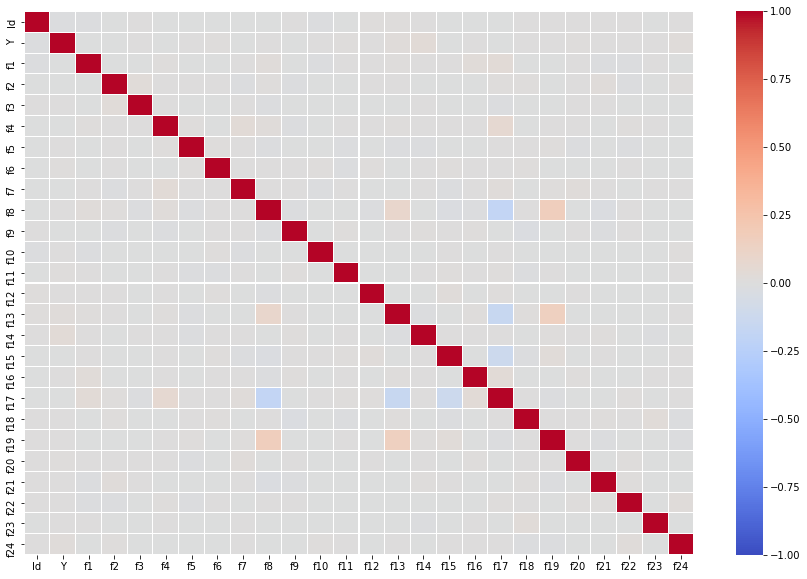

In [62]:
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15,10))

#https://www.kaggle.com/qianchao/smote-with-imbalance-data

sns.heatmap(train_df.corr(), annot = False, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm', linewidths=0.01, linecolor='white')

plt.show()


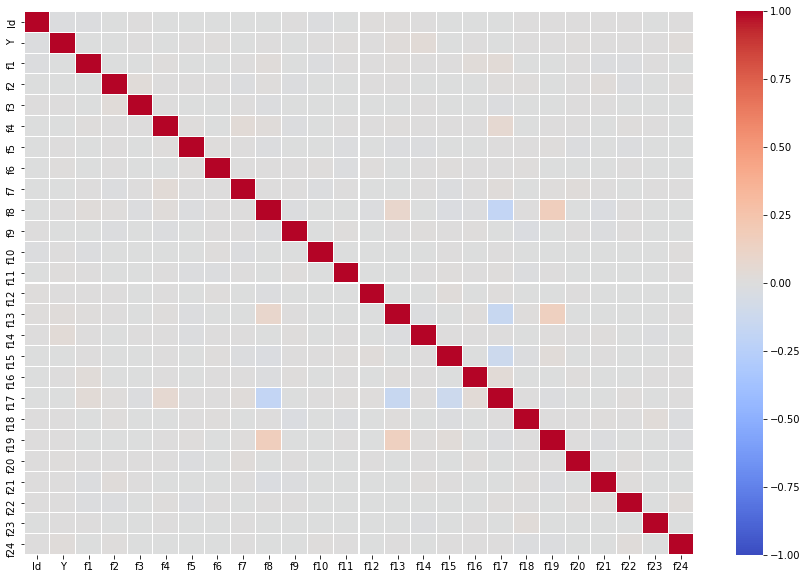

From the correlation plot we observe that no two variables are highly co-related.


Text(0, 0.5, 'Frequency')

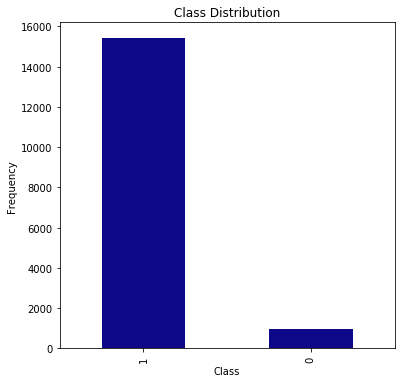

In [63]:
# Checking the distribution of target varibale w.r.t class 0 or class 1

class_dist = pd.value_counts(train_df['Y'],sort=True)
class_dist.plot(kind='bar',colormap="plasma",figsize=(6,6))
plt.title("Class Distribution")
plt.xlabel("Class")
plt.ylabel("Frequency")

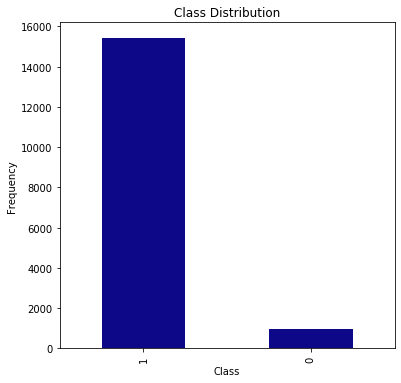

In [64]:
train_df['Y'].value_counts()

1    15435
0      948
Name: Y, dtype: int64

In [65]:
print('Number of records that belong to class 0:',train_df['Y'].value_counts()[0])
print('Number of records that belong to class 1:',train_df['Y'].value_counts()[1])

Number of records that belong to class 0: 948
Number of records that belong to class 1: 15435


<Figure size 432x288 with 0 Axes>

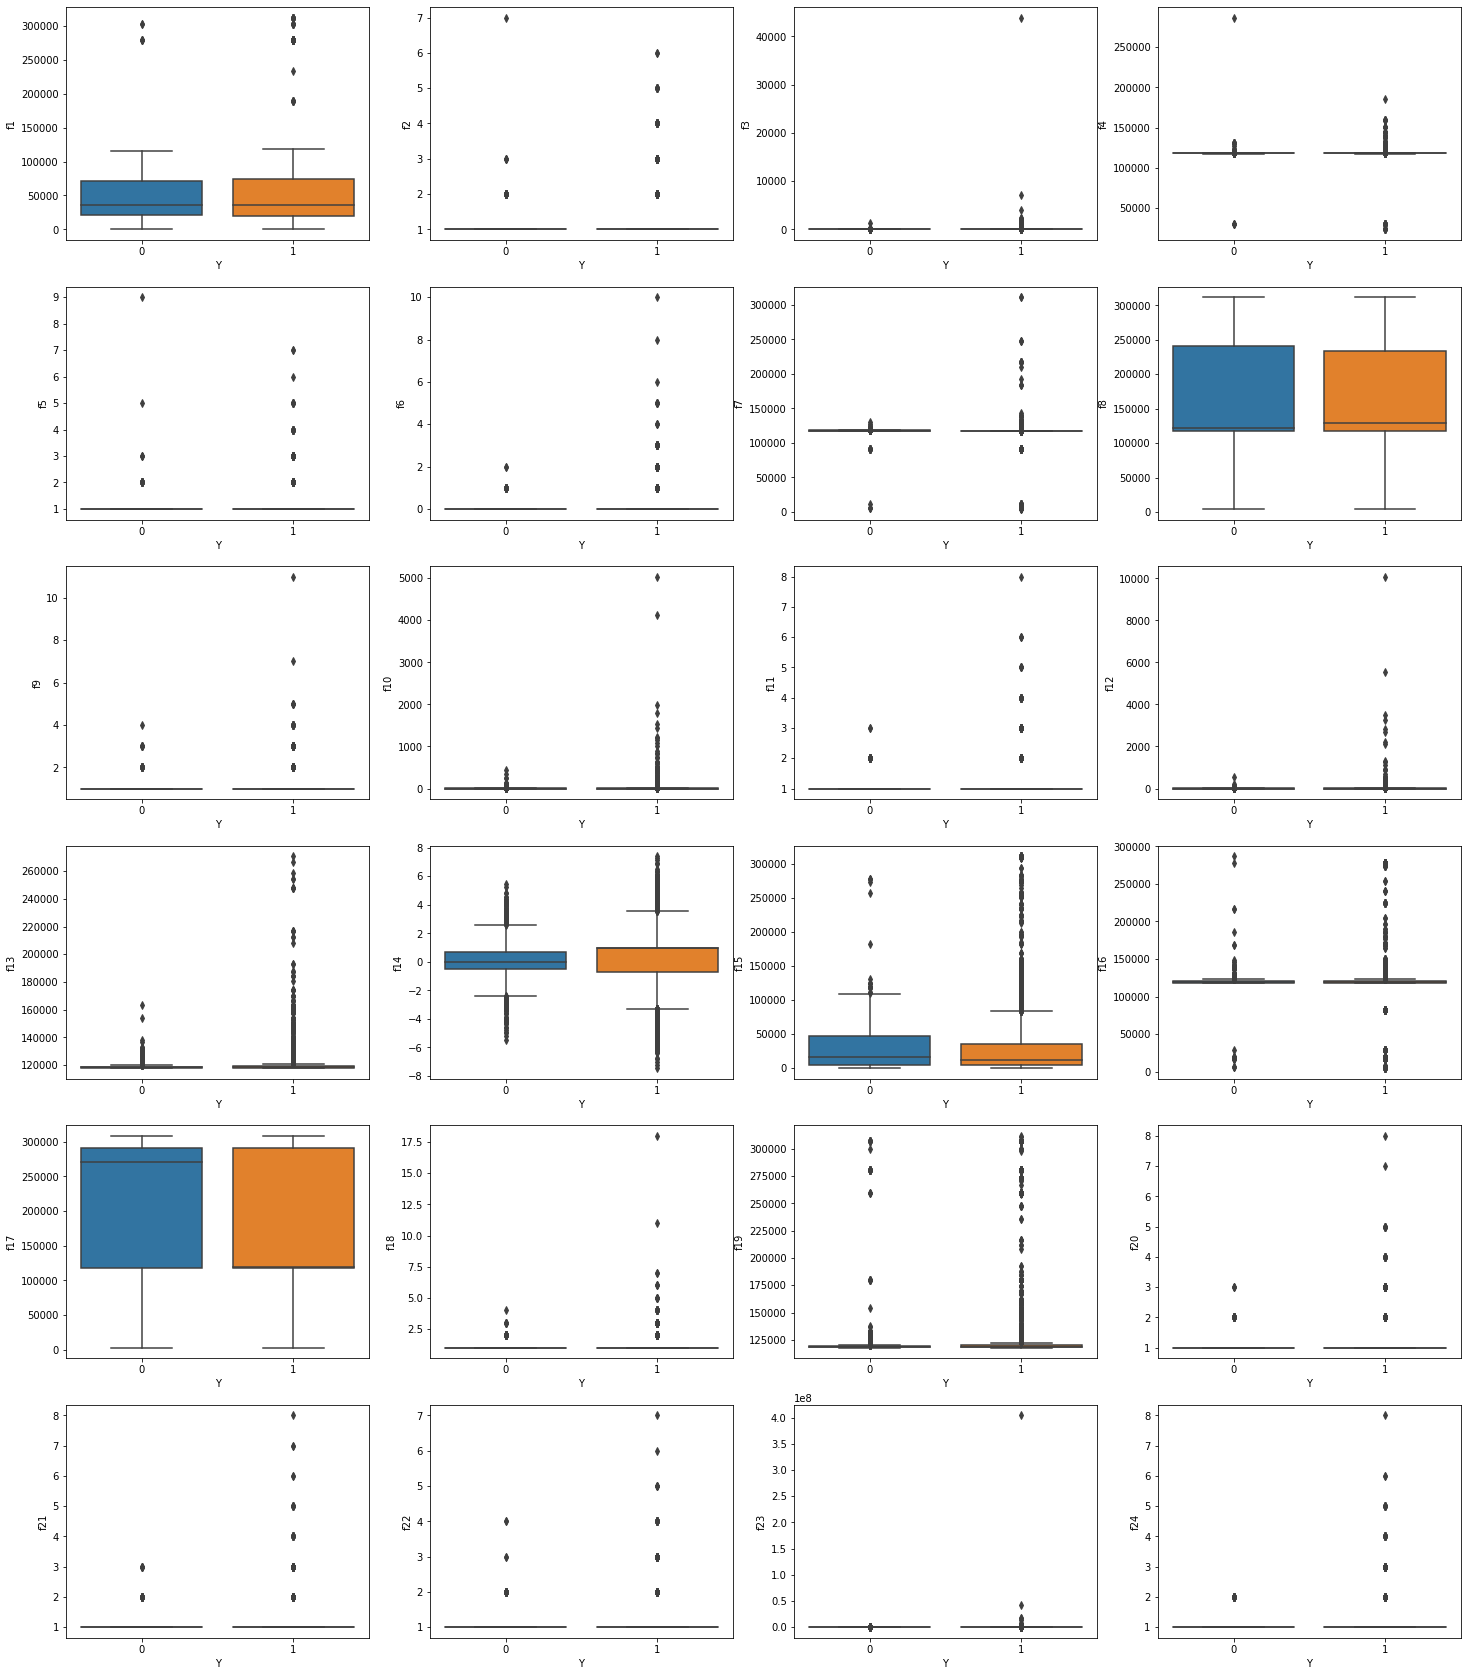

In [66]:
#https://analyticsindiamag.com/7-types-classification-algorithms/
## we check the distribution of f2, f5, f6, f9, f11, f18, f20, f21, f22 and f24 have almost same distribution for both 0's and 1's 
## Therefore it will be difficult for the algorithm to seperate 1's and 0's from these distribution
features = train_df.drop(['Id','Y'],axis=1)
col = features.columns
position=0
fig = plt.figure()
fig, ax = plt.subplots(5,5,figsize=(25,30))
for feature in col:
   position = position + 1
   ax = plt.subplot(6,4,position)
   sns.boxplot(x=train_df['Y'],y=train_df[feature],data=train_df)
plt.show()


<Figure size 432x288 with 0 Axes>

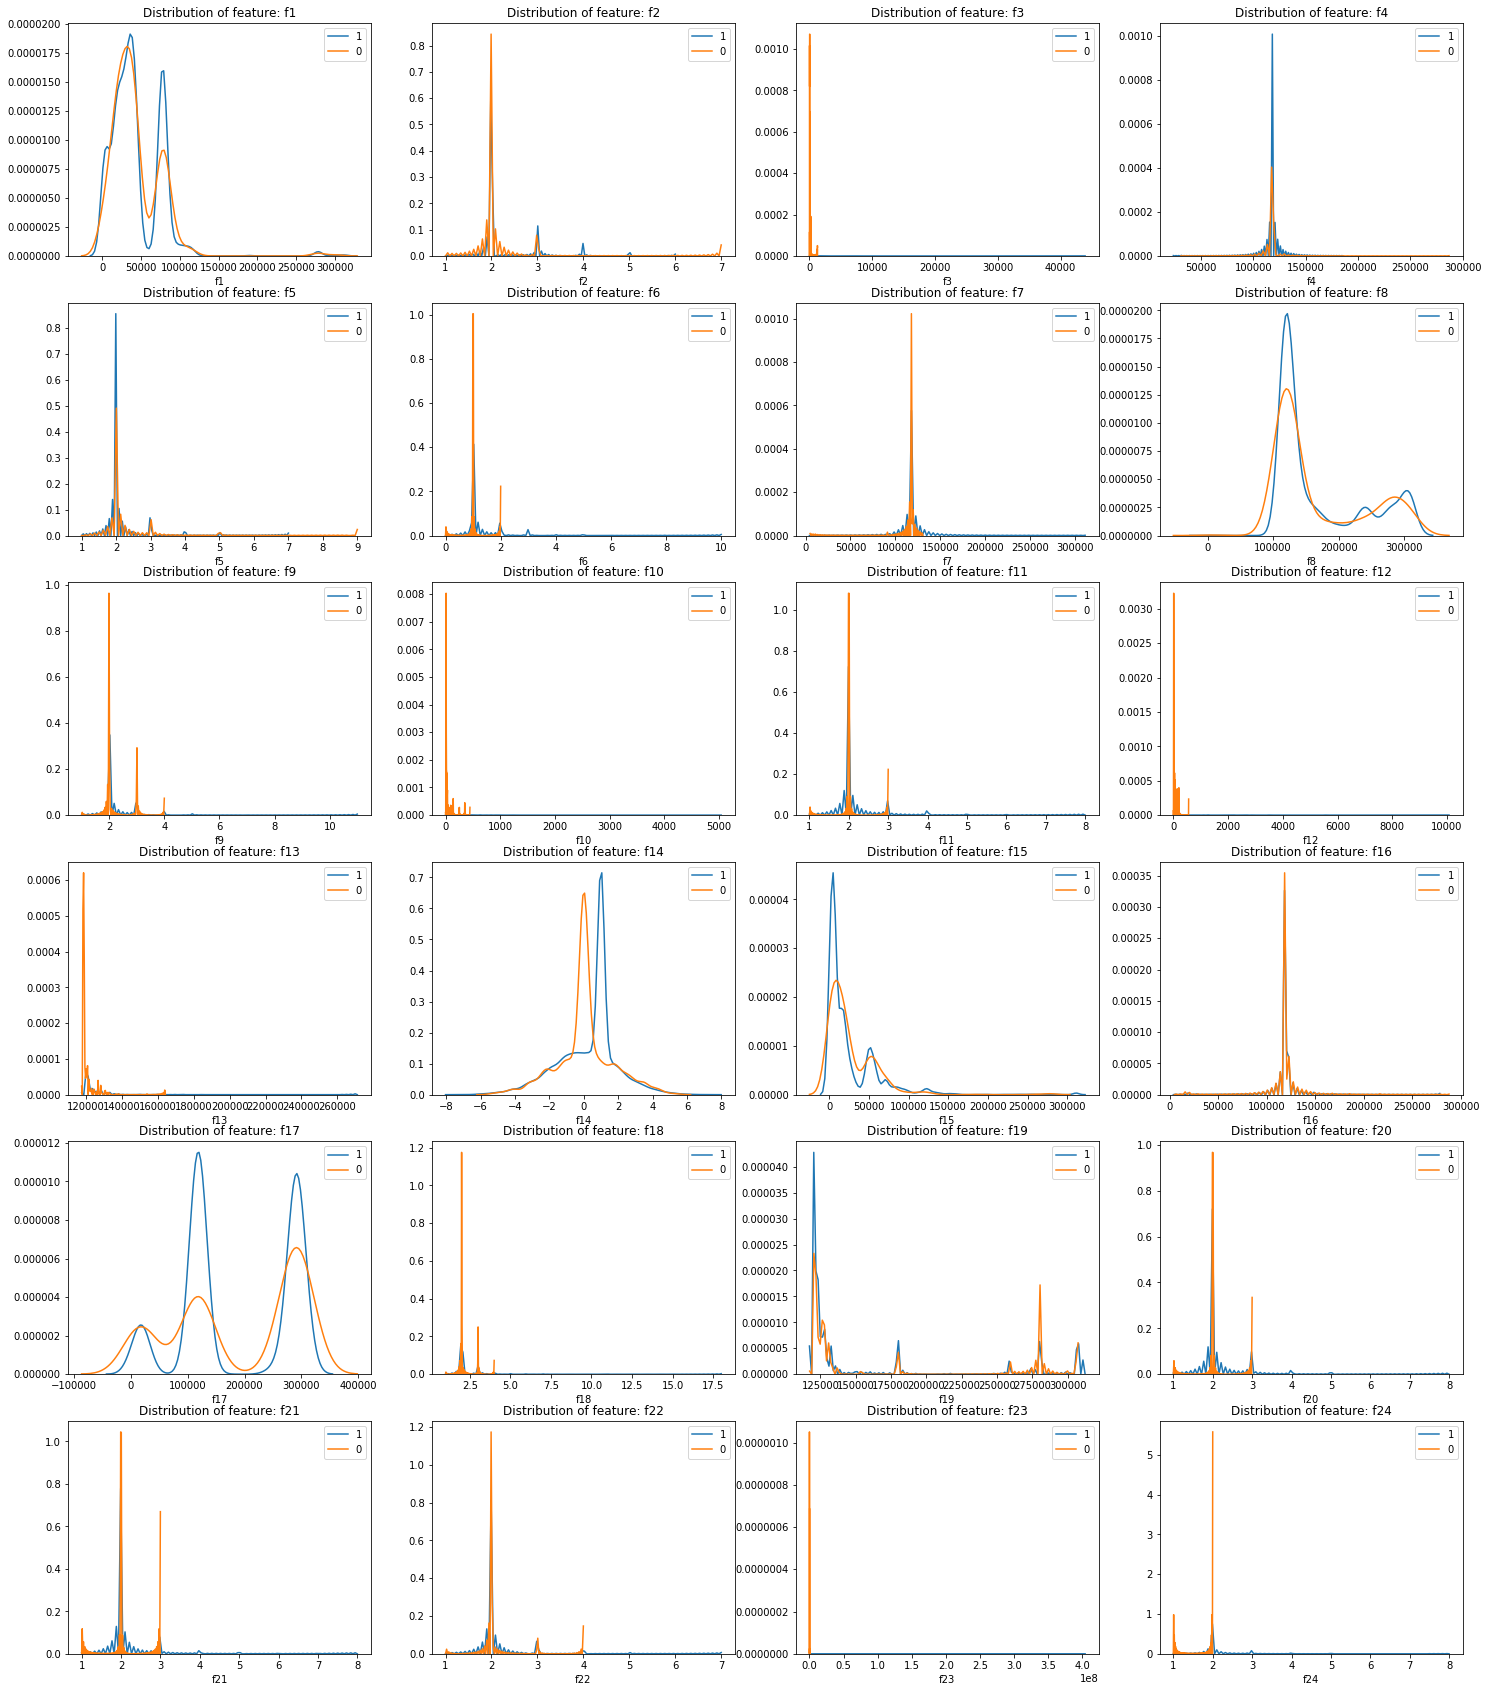

In [67]:
train_C0 = train_df[train_df['Y']==0]
train_C1 = train_df[train_df['Y']==1]


#https://matplotlib.org/3.1.0/gallery/subplots_axes_and_figures/subplots_demo.html

position=0
fig = plt.figure()
fig, ax = plt.subplots(5,5,figsize=(25,30))
for feature in col:
    position = position + 1
    ax = plt.subplot(6,4,position)
    sns.kdeplot(train_C1[feature],label = 1)
    sns.kdeplot(train_C0[feature], label = 0)
    ax.set_xlabel(feature)
    ax.set_title('Distribution of feature: ' + str(feature))
    plt.legend(loc='best')
plt.show()

In [0]:
# f24,f5,f6,f11,f20,f22,f9,f2,f18,f21 have less feature importance
# f24,f22,f21,f20,f9,f18,f9,f6,f5,f11 have almost same distribution for both class = 0 and class = 1 
X = train_df.iloc[:,2:]
y = train_df.iloc[:,1]
X_test = test_df.iloc[:,1:]

[0.08637111 0.00890202 0.05470001 0.0791274  0.0068973  0.00644278
 0.04117849 0.06100794 0.00825921 0.05486348 0.00718187 0.05754287
 0.04220802 0.13112266 0.08733861 0.0770257  0.03778431 0.00914863
 0.04092311 0.0073711  0.00841888 0.00800404 0.07262171 0.00555874]


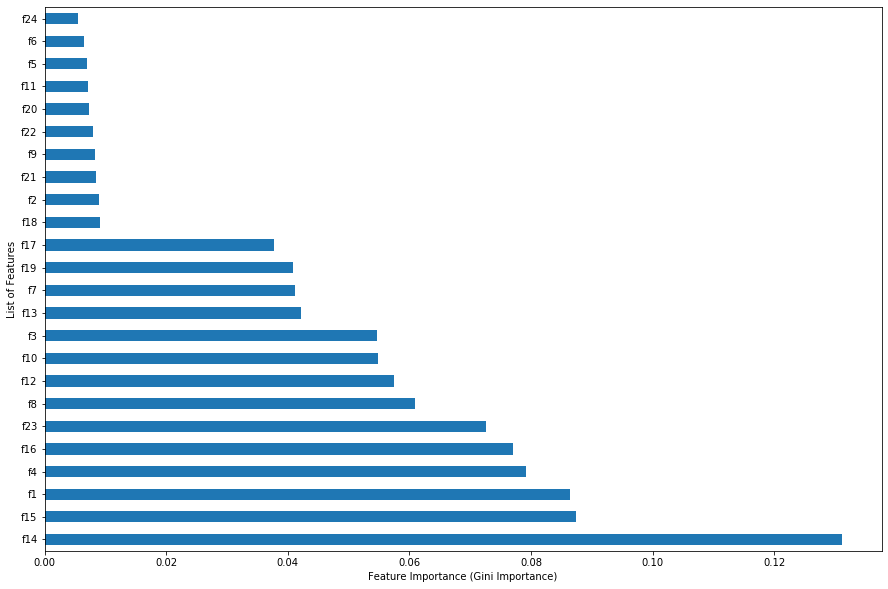

In [69]:
#Feature Importance

#https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html feature importance
#https://towardsdatascience.com/feature-selection-techniques-in-machine-learning-with-python-f24e7da3f36e

from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(15,10))
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.sort_values(ascending=False).plot(kind='barh')
plt.xlabel('Feature Importance (Gini Importance)')
plt.ylabel('List of Features')
plt.show()

In [0]:
# From the above feature importance plot we can observe that these 10 features have least values for gini importance: f24,f5,f6,f11,f20,f22,f9,f2,f18,f21 
# so we can try removing it from the test and train sets

train_df_final = train_df.drop(['f24','f22','f21','f20','f9','f18','f9','f6','f5','f11'],axis=1)
test_df_final = test_df.drop(['f24','f22','f21','f20','f9','f18','f9','f6','f5','f11'],axis=1)

In [71]:
test_df_final.head()

,Id,f1,f2,f3,f4,f7,f8,f10,f12,f13,f14,f15,f16,f17,f19,f23
0,16384,37733,1,1.77,118603,118602,118097,0,1,117888,2.453740,13881,117941,117887,117885,1
1,16385,312129,1,3.54,118052,117961,290919,4,43,118322,-0.012317,14638,118992,290919,118321,7
2,16386,24884,1,23.01,118300,117961,302830,0,1,128231,1.000000,770,119181,4673,128230,14
3,16387,4674,1,1.77,119091,119062,118036,9,1,117908,1.000000,16752,143531,290919,117905,81
4,16388,68725,1,3.54,118300,117961,171056,0,6,118639,-0.503250,4945,118360,118638,118636,1


In [0]:
# f24,f5,f6,f11,f20,f22,f9,f2,f18,f21 have less feature importance
# f24,f22,f21,f20,f9,f18,f9,f6,f5,f11 have almost same distribution for both class = 0 and class = 1 

X_final = train_df_final.iloc[:,2:]
y_final = train_df_final.iloc[:,1]
test_final = test_df_final.iloc[:,1:]

In [73]:
train_df_final.columns

Index(['Id', 'Y', 'f1', 'f2', 'f3', 'f4', 'f7', 'f8', 'f10', 'f12', 'f13',
       'f14', 'f15', 'f16', 'f17', 'f19', 'f23'],
      dtype='object')

In the below steps I was trying to normalize the data but I dont know where I was going wrong because I was getting a score of 0.54 on public leader board with normalized data and xgb


In [0]:

# from sklearn.preprocessing import StandardScaler
# from sklearn import preprocessing 
# nparray = train_df_final.drop(['Id','Y'],axis=1).values #returns a numpy array
# min_max_scaler = preprocessing.MinMaxScaler()
# nparray
# train_scaled = min_max_scaler.fit_transform(nparray)
# train_scaled.shape

In [0]:
# train_scaled = min_max_scaler.fit_transform(nparray)
# train_scaled
# train_normalize = pd.DataFrame(train_scaled)
# train_normalize.columns = 'f1', 'f2', 'f3', 'f4','f7', 'f8', 'f10', 'f12', 'f13', 'f14', 'f15', 'f16','f17','f19','f23'
# train_final = pd.concat([train_df_final.iloc[:,:2],train_normalize],axis=1)

In [0]:
##Splitting dataset for cross validation
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size=0.33, random_state=42)

def cross_validation(model,X_train,y_train,modelName):
    scoring = 'roc_auc'
    score = model_selection.cross_val_score(model, X_train, y_train, cv = 10, scoring=scoring)
    mean_score = score.mean()
    print("ROC-AUC Value for " + str(modelName) + ": %.3f (%.3f)" % (score.mean(), score.std()))
    return mean_score

In [0]:
# since we need to perform the below steps many times I tried to make a generalized function to predict the test data and download the result file

def predictionsOutput(model,testData,modelname):
  predictions = model.predict_proba(testData)
  result = pd.DataFrame({"Id": test_df["Id"], 'Y':predictions[:,1]})
  file_name = 'predictions' + str(modelname) + '.csv'
  result.to_csv(file_name, index=False)
  files.download(file_name)
  


## Model 1 : Naive Bayes-GaussianNB


In [0]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_final,y_final)

GaussianNB(priors=None, var_smoothing=1e-09)

In [0]:
predictionsOutput(nb,test_final,'GaussianNB')

In [76]:
cross_validation(nb,X_final,y_final,'Naive-Bayes')

ROC-AUC Value for Naive-Bayes: 0.564 (0.019)


0.5638321086538236

## Model No. 2 Stochastic Gradient Descent Classifier
#### The class SGDClassifier implements a plain stochastic gradient descent learning routine which supports different loss functions and penalties for classification.

In [92]:
from sklearn.linear_model import SGDClassifier

sdgc_model = SGDClassifier(loss='modified_huber',max_iter=10,shuffle=True,random_state=101)
sdgc_model.fit(X_final,y_final)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_stochastic_gradient.py:557: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='modified_huber',
              max_iter=10, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=101, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [95]:
cross_validation(sdgc_model,X_final,y_final,'SGDClassifier')

ROC-AUC Value for SGDClassifier: 0.506 (0.043)


0.5064947191913308

In [0]:
predictionsOutput(sdgc_model,test_final,'SGDC_Classifier')

## Model No.3:  K- Nearest Neighbours
Neighbours based classification is a type of lazy learning as it does not attempt to construct a general internal model, but simply stores instances of the training data. Classification is computed from a simpl`e majority vote of the k nearest neighbours of each point.`

In [0]:
from sklearn.neighbors import KNeighborsClassifier

In [99]:
KNN_Classifier = KNeighborsClassifier(n_neighbors=15)
KNN_Classifier.fit(X_final,y_final)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=15, p=2,
                     weights='uniform')

In [100]:
cross_validation(KNN_Classifier,X_final,y_final,'KNN_Classifier')

ROC-AUC Value for KNN_Classifier: 0.650 (0.017)


0.6496439369304

In [0]:
predictionsOutput(KNN_Classifier,test_final,'KNN_Classifier')

## Model No. 4 : Logistic Regression




In [0]:
logisticmodel = LogisticRegression()

In [0]:
##### Model No. 1 : LOGISTIC REGRESSION

#https://www.dezyre.com/recipes/optimize-hyper-parameters-of-logistic-regression-model-using-grid-search-in-python
# Create an scaler object
sc = StandardScaler()

# Create a pca object
pca = decomposition.PCA()

logistic = linear_model.LogisticRegression()

# Create a pipeline of three steps. First, standardize the data.
# Second, tranform the data with PCA.
# Third, train a logistic regression on the data.
pipe = Pipeline(steps=[('sc', sc),('pca', pca),('logistic', logistic)])

# Create Parameter Space
# Create a list of a sequence of integers from 1 to 30 (the number of features in X + 1)
n_components = list(range(1,X_final.shape[1]+1,1))


In [0]:
# Create a list of values of the regularization parameter
C = np.logspace(-4, 4, 50)

# Create a list of options for the regularization penalty
penalty = ['l1', 'l2']

In [0]:
# Create a dictionary of all the parameter options 
# Note has you can access the parameters of steps of a pipeline by using '__’
parameters = dict(pca__n_components=n_components,logistic__C=C,logistic__penalty=penalty)

# Create a grid search object
clf = GridSearchCV(pipe, parameters)

In [107]:
# Fit the grid search
clf.fit(X_final, y_final)
# View The Best Parameters
print('Best Penalty:', clf.best_estimator_.get_params()['logistic__penalty'])
print('Best C:', clf.best_estimator_.get_params()['logistic__C'])
print('Best Number Of Components:', clf.best_estimator_.get_params()['pca__n_components'])
print(); print(clf.best_estimator_.get_params()['logistic'])

Best Penalty: l2
Best C: 0.0001
Best Number Of Components: 1

LogisticRegression(C=0.0001, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


Best Penalty: l2
Best C: 0.0001
Best Number Of Components: 1

LogisticRegression(C=0.0001, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
cross_validation(clf,X_final,y_final,'Logistic Regression')

ROC-AUC Value for Logistic Regression: 0.506 (0.038)


0.5057835037932855

It took a long time to cross validate entire data in logistic regression and the AUC score was 0.5.57835
ROC-AUC Value for Logistic Regression: 0.506 (0.038)
0.5057835037932855

In [0]:
predictionsOutput(clf,test_final,'LogisticRegression')

## Model No. 4 Gradient Boosting Classifier

In [0]:
from sklearn.ensemble import GradientBoostingClassifier

In [0]:
gradient_boost=GradientBoostingClassifier(n_estimators=400,learning_rate=0.1,random_state=100,max_features=4 )

In [111]:
cross_validation(gradient_boost,X_final,y_final,'gradient_boost')

ROC-AUC Value for gradient_boost: 0.866 (0.020)


0.8657215325717396

In [113]:
gradient_boost.fit(X_final,y_final)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=4, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=400,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=100, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [0]:
predictionsOutput(gradient_boost,test_final,'Gradient_Boost')

## Model No. 5 : Decision Trees

In [0]:
## Model No. 5 Decision Trees

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

In [119]:
tree_depth = []
for d in range(2,9):
    decision_tree = tree.DecisionTreeClassifier(max_depth=d,criterion='gini',class_weight="balanced",min_weight_fraction_leaf=0.01)
    # Perform 7-fold cross validation 
    val_scores = cross_val_score(estimator=decision_tree, X=X_final, y=y_final, cv=7, n_jobs=4)
    tree_depth.append((d,val_scores.mean()))
print(tree_depth)

[(2, 0.6813157865913099), (3, 0.6875420061451673), (4, 0.6992046801743512), (5, 0.6901681497580686), (6, 0.7074411705338661), (7, 0.7183083682656515), (8, 0.7280703538712937)]


In [0]:
decision_tree_classifier = tree.DecisionTreeClassifier(max_depth=8,criterion='gini',class_weight="balanced",min_weight_fraction_leaf=0.01)

In [123]:
decision_tree_classifier.fit(X_final,y_final)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight='balanced', criterion='gini',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.01, presort='deprecated',
                       random_state=None, splitter='best')

In [121]:
cross_validation(decision_tree_classifier,X_final,y_final,'Decision_Tree')

ROC-AUC Value for Decision_Tree: 0.795 (0.017)


0.7949129341434995

In [0]:
predictionsOutput(decision_tree_classifier,test_final,'Decision_Tree')

## Model No. 6 : Random Forest Classifier

In [0]:
random_forest_classifier = RandomForestClassifier(n_estimators=200,max_depth=8,min_samples_split=10,class_weight="balanced",random_state=100) #manually set the hyper parans

In [126]:
cross_validation(random_forest_classifier,X_final,y_final,'Random_Forest')

ROC-AUC Value for Random_Forest: 0.838 (0.019)


0.837695534741191

In [129]:
random_forest_classifier.fit(X_final,y_final)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=8, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=100,
                       verbose=0, warm_start=False)

In [0]:
predictionsOutput(random_forest_classifier,test_final,'Random_Classifier')

In [0]:
## Hyperparameter Tuning of Random Forest Classifier:

ITERATIONS = 20 
TRAINING_SIZE = 100000 
TEST_SIZE = 25000
# Classifier
bayes_cv_tuner = BayesSearchCV(
    estimator = RandomForestClassifier(
        n_jobs = -1
    ),
    search_spaces = {
    'min_samples_split': [3, 5, 8, 10, 20], 
    'n_estimators' : [100, 500],
    'max_depth': [3, 5, 8, 10, 15],
    'max_features': [3, 5, 8]
},    
    scoring = 'roc_auc',
    cv = StratifiedKFold(
        n_splits=3,
        shuffle=True,
        random_state=42
    ),
    n_jobs = 3,
    n_iter = ITERATIONS,   
    verbose = 0,
    refit = True,
    random_state = 42
)

In [0]:
def Print_Model_Results(optim_result):
    """Status callback durring bayesian hyperparameter search"""
    
    # Get all the models tested so far in DataFrame format
    all_models = pd.DataFrame(bayes_cv_tuner.cv_results_)    
    
    # Get current parameters and the best parameters    
    best_params = pd.Series(bayes_cv_tuner.best_params_)
    print('Model #{}\nBest ROC-AUC: {}\nBest params: {}\n'.format(
        len(all_models),
        np.round(bayes_cv_tuner.best_score_, 4),
        bayes_cv_tuner.best_params_
    ))
    
    # Save all model results
    clf_name = bayes_cv_tuner.estimator.__class__.__name__
    all_models.to_csv(clf_name+"_cv_results.csv")

In [133]:
result = bayes_cv_tuner.fit(X_final, y_final, callback=Print_Model_Results)

Model #1
Best ROC-AUC: 0.8225
Best params: OrderedDict([('max_depth', 8), ('max_features', 8), ('min_samples_split', 20), ('n_estimators', 226)])

Model #2
Best ROC-AUC: 0.8293
Best params: OrderedDict([('max_depth', 15), ('max_features', 8), ('min_samples_split', 5), ('n_estimators', 480)])

Model #3
Best ROC-AUC: 0.8293
Best params: OrderedDict([('max_depth', 15), ('max_features', 8), ('min_samples_split', 5), ('n_estimators', 480)])

Model #4
Best ROC-AUC: 0.8511
Best params: OrderedDict([('max_depth', 15), ('max_features', 3), ('min_samples_split', 8), ('n_estimators', 421)])

Model #5
Best ROC-AUC: 0.8511
Best params: OrderedDict([('max_depth', 15), ('max_features', 3), ('min_samples_split', 8), ('n_estimators', 421)])

Model #6
Best ROC-AUC: 0.8511
Best params: OrderedDict([('max_depth', 15), ('max_features', 3), ('min_samples_split', 8), ('n_estimators', 421)])

Model #7
Best ROC-AUC: 0.8511
Best params: OrderedDict([('max_depth', 15), ('max_features', 3), ('min_samples_split', 

In [0]:
rfc_tuned = RandomForestClassifier(n_estimators=500,max_depth=15,min_samples_split=5,max_features=3) #manually set the hyper parans

In [135]:
cross_validation(rfc_tuned,X_final,y_final,'Random_Forest_Tuned')

ROC-AUC Value for Random_Forest_Tuned: 0.873 (0.019)


0.8732638912670329

In [0]:
random_forest_classifier.fit(X_final,y_final)
predictionsOutput(random_forest_classifier,test_final,'Random_Classifier_Tuned')

## Model No. 7 Light GBM Classifier

In [0]:
from lightgbm import LGBMClassifier

In [0]:
# SETTINGS - CHANGE THESE TO GET SOMETHING MEANINGFUL
ITERATIONS = 20
TRAINING_SIZE = 1000000 
TEST_SIZE = 250000


# Classifier
bayes_cv_tuner = BayesSearchCV(
    estimator = lgb.LGBMClassifier(
        n_jobs = 1,
        objective = 'binary',
        eval_metric = 'auc',
        silent=1,
        tree_method='approx'
    ),
    search_spaces = {
        'learning_rate': (0.01, 1.0, 'log-uniform'),
        'min_child_weight': (1, 9),
        'max_depth': (3, 20),
        'subsample': (0.01, 1.0, 'uniform'),
        'colsample_bytree': (0.01, 1.0, 'uniform'),
        'min_child_weight': (1, 3),
        'n_estimators': (150, 550)

    },    
    scoring = 'roc_auc',
    cv = StratifiedKFold(
        n_splits=7,
        shuffle=True,
        random_state=42
    ),
    n_jobs = 3,
    n_iter = ITERATIONS,   
    verbose = 0,
    refit = True,
    random_state = 42
)

In [0]:
def Print_LGBModel_Results(optim_result):
    """Status callback durring bayesian hyperparameter search"""
    
    # Get all the models tested so far in DataFrame format
    all_models = pd.DataFrame(bayes_cv_tuner.cv_results_)    
    
    # Get current parameters and the best parameters    
    best_params = pd.Series(bayes_cv_tuner.best_params_)
    print('Model #{}\nBest ROC-AUC: {}\nBest params: {}\n'.format(
        len(all_models),
        np.round(bayes_cv_tuner.best_score_, 4),
        bayes_cv_tuner.best_params_
    ))
    
    # Save all model results
    clf_name = bayes_cv_tuner.estimator.__class__.__name__
    all_models.to_csv(clf_name+"_cv_results.csv")

In [144]:
result_lgb = bayes_cv_tuner.fit(X_final, y_final, callback=Print_LGBModel_Results)

Model #1
Best ROC-AUC: 0.8701
Best params: OrderedDict([('colsample_bytree', 0.4160029192647807), ('learning_rate', 0.28539836866041823), ('max_depth', 19), ('min_child_weight', 2), ('n_estimators', 418), ('subsample', 0.4199774461606831)])

Model #2
Best ROC-AUC: 0.8701
Best params: OrderedDict([('colsample_bytree', 0.4160029192647807), ('learning_rate', 0.28539836866041823), ('max_depth', 19), ('min_child_weight', 2), ('n_estimators', 418), ('subsample', 0.4199774461606831)])

Model #3
Best ROC-AUC: 0.8701
Best params: OrderedDict([('colsample_bytree', 0.4160029192647807), ('learning_rate', 0.28539836866041823), ('max_depth', 19), ('min_child_weight', 2), ('n_estimators', 418), ('subsample', 0.4199774461606831)])

Model #4
Best ROC-AUC: 0.8701
Best params: OrderedDict([('colsample_bytree', 0.4160029192647807), ('learning_rate', 0.28539836866041823), ('max_depth', 19), ('min_child_weight', 2), ('n_estimators', 418), ('subsample', 0.4199774461606831)])

Model #5
Best ROC-AUC: 0.876
Bes

In [0]:
lgb_bayestuned = LGBMClassifier(colsample_bytree = 0.7184606351164922,learning_rate = 0.1118651457006259,max_depth=20,min_child_weight=3,n_estimators=550,subsample=0.01)

In [146]:
cross_validation(lgb_bayestuned,X_final,y_final,'LGB_Tuned')

ROC-AUC Value for LGB_Tuned: 0.880 (0.014)


0.8803523342826285

Parameter Range: 

    search_spaces = {
        'learning_rate': (0.01, 1.0, 'log-uniform'),
        'min_child_weight': (1, 9),
        'max_depth': (3, 20),
        'subsample': (0.01, 1.0, 'uniform'),
        'colsample_bytree': (0.01, 1.0, 'uniform'),
        'min_child_weight': (1, 3),
        'n_estimators': (150, 550)

    },   

Params:  LGBMClassifier(colsample_bytree = 0.7184606351164922,learning_rate = 0.1118651457006259,max_depth=20,min_child_weight=3,n_estimators=550,subsample=0.01)

ROC-AUC Value for LGB_Tuned: 0.880 (0.014)
0.8803523342826285

## Model No. 8 XGB Classifier

In [0]:
### BayesCV

#https://www.kaggle.com/nanomathias/bayesian-optimization-of-xgboost-lb-0-9769

ITERATIONS = 50
TRAINING_SIZE = 1000000 
TEST_SIZE = 250000


# Classifier
bayes_cv_tuner = BayesSearchCV(
    estimator = xgb.XGBClassifier(
        n_jobs = 1,
        objective = 'binary:logistic',
        eval_metric = 'auc',
        silent=1,
        tree_method='approx'
    ),
      search_spaces = {

        # set final : AUC 0.90609 final value 0.9158
        'min_samples_split': [3, 5, 8, 10, 20], 
        'n_estimators' : (100, 600),
        'max_depth': (3,20),
        'max_features': [3, 5, 8],
        'learning_rate': (0.01, 1.0, 'log-uniform'),
        'colsample_bytree': (0.1, 1.0, 'uniform'),
        'colsample_bylevel': (0.4, 1.0, 'uniform')


    },     
    scoring = 'roc_auc',
    cv = StratifiedKFold(
        n_splits=5,
        shuffle=True,
        random_state=42
    ),
    n_jobs = 3,
    n_iter = ITERATIONS,   
    verbose = 0,
    refit = True,
    random_state = 42
)

Below is the list of parameter range that I tried for tuning the XGB

In [0]:
    #      Set 3: auc: 0.90609
    #     'min_samples_split': [3, 5, 8, 10, 20], 
    #     'n_estimators' : (100, 600),
    #     'max_depth': (3,20),
    #     'max_features': [3, 5, 8],
    #     'learning_rate': (0.01, 1.0, 'log-uniform'),
    #     'colsample_bytree': (0.1, 1.0, 'uniform'),
    #     'colsample_bylevel': (0.4, 1.0, 'uniform')

      # set 1 :  intial AUC 0.90564
        # 'min_samples_split': [3, 5, 8, 10, 20], 
        # 'n_estimators' : (100, 600),
        # 'max_depth': (3,20),
        # 'max_features': [3, 5, 8],
        # 'learning_rate': (0.01, 1.0, 'log-uniform'),
        # 'colsample_bytree': (0.1, 1.0, 'uniform'),
        # 'colsample_bylevel': (0.4, 1.0, 'uniform'),

        # ##
        # 'scale_pos_weight':(1,120)

        # 'min_samples_split': [3, 5, 8, 10, 20], 
        # 'n_estimators' : (100, 500),
        # 'max_depth': [3, 5, 8, 10, 15,20],
        # 'max_features': [3, 5, 8,10],
        # 'learning_rate': (0.01, 1.0, 'log-uniform'),
        # 'colsample_bytree': (0.01, 1.0, 'uniform'),
        # 'colsample_bylevel': (0.01, 1.0, 'uniform'),
        # 'max_delta_step':(1,10), #new param
        # 'gamma':(0.5,8),
        # 'scale_pos_weight': (1, 100, 'log-uniform') #new param

        #set 2 
        #  'n_estimators' : (200, 1000),
        # 'max_depth': [3, 5, 8, 10, 15,20],
        # 'min_child_weight':(1,10),
        # 'learning_rate': (0.01, 1.0, 'log-uniform'),
        # 'colsample_bytree': (0.01, 1.0, 'uniform'),
        # 'colsample_bylevel': (0.2, 1.0, 'uniform'),
        #  'gamma': [0.5, 1, 1.5, 2, 5,8,10],
        #  'max_delta_step':(1,10)


 #l2 518
        #  'min_samples_split': [3, 5, 8, 10, 20], 
        # 'n_estimators' : (100, 600),
        # 'max_depth': (3,20),
        # 'max_features': [3, 5, 8],
        # 'learning_rate': (0.01, 1.0, 'log-uniform'),
        # 'colsample_bytree': (0.1, 1.0, 'uniform'),
        # 'colsample_bylevel': (0.4, 1.0, 'uniform'),
        # 'max_delta_step':(1,5),
        # 'reg_alpha':(0.001,1.0),
        # 'subsample':(0.5,1),
        # 'min_child_weight':(1,10)


        

        # set 4 : AUC 0.90609
        # 'min_samples_split': [3, 5, 8, 10, 20], 
        # 'n_estimators' : (100, 600),
        # 'max_depth': [3, 5, 8, 10, 15,20],
        # 'max_features': [3, 5, 8,10,15,20],
        # 'learning_rate': (0.01, 1.0, 'log-uniform'),
        # 'colsample_bytree': (0.1, 1.0, 'uniform'),
        # 'colsample_bylevel': (0.1, 1.0, 'uniform'),
        # 'scale_pos_weight':(1,120)
        
        
        #'gamma':(1e-6, 0.8, 'log-uniform'),
        # 'min_child_weight':[6,8,10,12]

        # 'min_samples_split': [3, 5, 8, 10, 20], 
        # 'n_estimators' : (100, 700),
        # 'max_depth': [3, 5, 8, 10, 15],
        # 'max_features': [3, 5, 8],
        # 'learning_rate': (0.01, 1.0, 'log-uniform'),
        # 'colsample_bytree': (0.01, 1.0, 'uniform'),
        # 'colsample_bylevel': (0.01, 1.0, 'uniform'),
        # 'gamma':(1,10),
        #  'subsample': (0.5, 1.0, 'uniform'),
        #  'scale_pos_weight': (1, 100, 'log-uniform')


        # 'scale_pos_weight': (10, 100, 'log-uniform'),
        # 'learning_rate': (0.2, 1.0, 'log-uniform'),
        # 'min_child_weight': (1, 9),
        # 'max_depth': (3, 20),
        # 'subsample': (0.5, 1.0, 'uniform'),
        # 'colsample_bytree': (0.5, 1.0, 'uniform'),
        # 'min_child_weight': (1, 5),
        # 'n_estimators' : (300, 800),
        # 'gamma':(4,10),
        # 'colsample_bylevel': (0.4, 1.0, 'uniform')

# Model #30
# Best ROC-AUC: 0.891
# Best params: OrderedDict([('colsample_bylevel', 0.4), ('colsample_bytree', 0.27608852148395063), ('learning_rate', 0.05130200263047589), ('max_depth', 20), ('max_features', 3), ('min_samples_split', 3), ('n_estimators', 600)])


In [0]:
def print_status_XGB(optim_result):
    """Status callback durring bayesian hyperparameter search"""
    
    # Get all the models tested so far in DataFrame format
    all_models = pd.DataFrame(bayes_cv_tuner.cv_results_)    
    
    # Get current parameters and the best parameters    
    best_params = pd.Series(bayes_cv_tuner.best_params_)
    print('Model #{}\nBest ROC-AUC: {}\nBest params: {}\n'.format(
        len(all_models),
        np.round(bayes_cv_tuner.best_score_, 4),
        bayes_cv_tuner.best_params_
    ))
    
    # Save all model results
    clf_name = bayes_cv_tuner.estimator.__class__.__name__
    all_models.to_csv(clf_name+"_cv_results.csv")

In [149]:
result_xgb = bayes_cv_tuner.fit(X_final, y_final, callback=print_status_XGB)

#https://www.kaggle.com/c/home-credit-default-risk/discussion/59195#350023 

Model #1
Best ROC-AUC: 0.8602
Best params: OrderedDict([('colsample_bylevel', 0.6460623753119883), ('colsample_bytree', 0.7549531688595925), ('learning_rate', 0.7340675018434776), ('max_depth', 8), ('max_features', 8), ('min_samples_split', 8), ('n_estimators', 275)])

Model #2
Best ROC-AUC: 0.8602
Best params: OrderedDict([('colsample_bylevel', 0.6460623753119883), ('colsample_bytree', 0.7549531688595925), ('learning_rate', 0.7340675018434776), ('max_depth', 8), ('max_features', 8), ('min_samples_split', 8), ('n_estimators', 275)])

Model #3
Best ROC-AUC: 0.8602
Best params: OrderedDict([('colsample_bylevel', 0.6460623753119883), ('colsample_bytree', 0.7549531688595925), ('learning_rate', 0.7340675018434776), ('max_depth', 8), ('max_features', 8), ('min_samples_split', 8), ('n_estimators', 275)])

Model #4
Best ROC-AUC: 0.8864
Best params: OrderedDict([('colsample_bylevel', 0.887437593014418), ('colsample_bytree', 0.2546844052569046), ('learning_rate', 0.1570703295827246), ('max_depth

Model #1
Best ROC-AUC: 0.8602
Best params: OrderedDict([('colsample_bylevel', 0.6460623753119883), ('colsample_bytree', 0.7549531688595925), ('learning_rate', 0.7340675018434776), ('max_depth', 8), ('max_features', 8), ('min_samples_split', 8), ('n_estimators', 275)])

Model #2
Best ROC-AUC: 0.8602
Best params: OrderedDict([('colsample_bylevel', 0.6460623753119883), ('colsample_bytree', 0.7549531688595925), ('learning_rate', 0.7340675018434776), ('max_depth', 8), ('max_features', 8), ('min_samples_split', 8), ('n_estimators', 275)])

Model #3
Best ROC-AUC: 0.8602
Best params: OrderedDict([('colsample_bylevel', 0.6460623753119883), ('colsample_bytree', 0.7549531688595925), ('learning_rate', 0.7340675018434776), ('max_depth', 8), ('max_features', 8), ('min_samples_split', 8), ('n_estimators', 275)])

Model #4
Best ROC-AUC: 0.8864
Best params: OrderedDict([('colsample_bylevel', 0.887437593014418), ('colsample_bytree', 0.2546844052569046), ('learning_rate', 0.1570703295827246), ('max_depth', 17), ('max_features', 5), ('min_samples_split', 3), ('n_estimators', 478)])

Model #5
Best ROC-AUC: 0.8864
Best params: OrderedDict([('colsample_bylevel', 0.887437593014418), ('colsample_bytree', 0.2546844052569046), ('learning_rate', 0.1570703295827246), ('max_depth', 17), ('max_features', 5), ('min_samples_split', 3), ('n_estimators', 478)])

Model #6
Best ROC-AUC: 0.8864
Best params: OrderedDict([('colsample_bylevel', 0.887437593014418), ('colsample_bytree', 0.2546844052569046), ('learning_rate', 0.1570703295827246), ('max_depth', 17), ('max_features', 5), ('min_samples_split', 3), ('n_estimators', 478)])

Model #7
Best ROC-AUC: 0.8864
Best params: OrderedDict([('colsample_bylevel', 0.887437593014418), ('colsample_bytree', 0.2546844052569046), ('learning_rate', 0.1570703295827246), ('max_depth', 17), ('max_features', 5), ('min_samples_split', 3), ('n_estimators', 478)])

Model #8
Best ROC-AUC: 0.8864
Best params: OrderedDict([('colsample_bylevel', 0.887437593014418), ('colsample_bytree', 0.2546844052569046), ('learning_rate', 0.1570703295827246), ('max_depth', 17), ('max_features', 5), ('min_samples_split', 3), ('n_estimators', 478)])

Model #9
Best ROC-AUC: 0.8864
Best params: OrderedDict([('colsample_bylevel', 0.887437593014418), ('colsample_bytree', 0.2546844052569046), ('learning_rate', 0.1570703295827246), ('max_depth', 17), ('max_features', 5), ('min_samples_split', 3), ('n_estimators', 478)])

Model #10
Best ROC-AUC: 0.8864
Best params: OrderedDict([('colsample_bylevel', 0.887437593014418), ('colsample_bytree', 0.2546844052569046), ('learning_rate', 0.1570703295827246), ('max_depth', 17), ('max_features', 5), ('min_samples_split', 3), ('n_estimators', 478)])

Model #11
Best ROC-AUC: 0.8864
Best params: OrderedDict([('colsample_bylevel', 0.887437593014418), ('colsample_bytree', 0.2546844052569046), ('learning_rate', 0.1570703295827246), ('max_depth', 17), ('max_features', 5), ('min_samples_split', 3), ('n_estimators', 478)])

Model #12
Best ROC-AUC: 0.8864
Best params: OrderedDict([('colsample_bylevel', 0.887437593014418), ('colsample_bytree', 0.2546844052569046), ('learning_rate', 0.1570703295827246), ('max_depth', 17), ('max_features', 5), ('min_samples_split', 3), ('n_estimators', 478)])

Model #13
Best ROC-AUC: 0.8864
Best params: OrderedDict([('colsample_bylevel', 0.887437593014418), ('colsample_bytree', 0.2546844052569046), ('learning_rate', 0.1570703295827246), ('max_depth', 17), ('max_features', 5), ('min_samples_split', 3), ('n_estimators', 478)])

Model #14
Best ROC-AUC: 0.8864
Best params: OrderedDict([('colsample_bylevel', 0.887437593014418), ('colsample_bytree', 0.2546844052569046), ('learning_rate', 0.1570703295827246), ('max_depth', 17), ('max_features', 5), ('min_samples_split', 3), ('n_estimators', 478)])

Model #15
Best ROC-AUC: 0.8864
Best params: OrderedDict([('colsample_bylevel', 0.887437593014418), ('colsample_bytree', 0.2546844052569046), ('learning_rate', 0.1570703295827246), ('max_depth', 17), ('max_features', 5), ('min_samples_split', 3), ('n_estimators', 478)])

Model #16
Best ROC-AUC: 0.8864
Best params: OrderedDict([('colsample_bylevel', 0.887437593014418), ('colsample_bytree', 0.2546844052569046), ('learning_rate', 0.1570703295827246), ('max_depth', 17), ('max_features', 5), ('min_samples_split', 3), ('n_estimators', 478)])

Model #17
Best ROC-AUC: 0.8864
Best params: OrderedDict([('colsample_bylevel', 0.887437593014418), ('colsample_bytree', 0.2546844052569046), ('learning_rate', 0.1570703295827246), ('max_depth', 17), ('max_features', 5), ('min_samples_split', 3), ('n_estimators', 478)])

Model #18
Best ROC-AUC: 0.891
Best params: OrderedDict([('colsample_bylevel', 0.4), ('colsample_bytree', 0.27608852148395063), ('learning_rate', 0.05130200263047589), ('max_depth', 20), ('max_features', 3), ('min_samples_split', 3), ('n_estimators', 600)])

Model #19
Best ROC-AUC: 0.891
Best params: OrderedDict([('colsample_bylevel', 0.4), ('colsample_bytree', 0.27608852148395063), ('learning_rate', 0.05130200263047589), ('max_depth', 20), ('max_features', 3), ('min_samples_split', 3), ('n_estimators', 600)])

Model #20
Best ROC-AUC: 0.891
Best params: OrderedDict([('colsample_bylevel', 0.4), ('colsample_bytree', 0.27608852148395063), ('learning_rate', 0.05130200263047589), ('max_depth', 20), ('max_features', 3), ('min_samples_split', 3), ('n_estimators', 600)])

Model #21
Best ROC-AUC: 0.891
Best params: OrderedDict([('colsample_bylevel', 0.4), ('colsample_bytree', 0.27608852148395063), ('learning_rate', 0.05130200263047589), ('max_depth', 20), ('max_features', 3), ('min_samples_split', 3), ('n_estimators', 600)])

Model #22
Best ROC-AUC: 0.891
Best params: OrderedDict([('colsample_bylevel', 0.4), ('colsample_bytree', 0.27608852148395063), ('learning_rate', 0.05130200263047589), ('max_depth', 20), ('max_features', 3), ('min_samples_split', 3), ('n_estimators', 600)])

Model #23
Best ROC-AUC: 0.891
Best params: OrderedDict([('colsample_bylevel', 0.4), ('colsample_bytree', 0.27608852148395063), ('learning_rate', 0.05130200263047589), ('max_depth', 20), ('max_features', 3), ('min_samples_split', 3), ('n_estimators', 600)])

Model #24
Best ROC-AUC: 0.891
Best params: OrderedDict([('colsample_bylevel', 0.4), ('colsample_bytree', 0.27608852148395063), ('learning_rate', 0.05130200263047589), ('max_depth', 20), ('max_features', 3), ('min_samples_split', 3), ('n_estimators', 600)])

Model #25
Best ROC-AUC: 0.891
Best params: OrderedDict([('colsample_bylevel', 0.4), ('colsample_bytree', 0.27608852148395063), ('learning_rate', 0.05130200263047589), ('max_depth', 20), ('max_features', 3), ('min_samples_split', 3), ('n_estimators', 600)])

Model #26
Best ROC-AUC: 0.891
Best params: OrderedDict([('colsample_bylevel', 0.4), ('colsample_bytree', 0.27608852148395063), ('learning_rate', 0.05130200263047589), ('max_depth', 20), ('max_features', 3), ('min_samples_split', 3), ('n_estimators', 600)])

Model #27
Best ROC-AUC: 0.891
Best params: OrderedDict([('colsample_bylevel', 0.4), ('colsample_bytree', 0.27608852148395063), ('learning_rate', 0.05130200263047589), ('max_depth', 20), ('max_features', 3), ('min_samples_split', 3), ('n_estimators', 600)])

Model #28
Best ROC-AUC: 0.891
Best params: OrderedDict([('colsample_bylevel', 0.4), ('colsample_bytree', 0.27608852148395063), ('learning_rate', 0.05130200263047589), ('max_depth', 20), ('max_features', 3), ('min_samples_split', 3), ('n_estimators', 600)])

Model #29
Best ROC-AUC: 0.891
Best params: OrderedDict([('colsample_bylevel', 0.4), ('colsample_bytree', 0.27608852148395063), ('learning_rate', 0.05130200263047589), ('max_depth', 20), ('max_features', 3), ('min_samples_split', 3), ('n_estimators', 600)])

Model #30
Best ROC-AUC: 0.891
Best params: OrderedDict([('colsample_bylevel', 0.4), ('colsample_bytree', 0.27608852148395063), ('learning_rate', 0.05130200263047589), ('max_depth', 20), ('max_features', 3), ('min_samples_split', 3), ('n_estimators', 600)])

Model #31
Best ROC-AUC: 0.891
Best params: OrderedDict([('colsample_bylevel', 0.4), ('colsample_bytree', 0.27608852148395063), ('learning_rate', 0.05130200263047589), ('max_depth', 20), ('max_features', 3), ('min_samples_split', 3), ('n_estimators', 600)])

Model #32
Best ROC-AUC: 0.891
Best params: OrderedDict([('colsample_bylevel', 0.4), ('colsample_bytree', 0.27608852148395063), ('learning_rate', 0.05130200263047589), ('max_depth', 20), ('max_features', 3), ('min_samples_split', 3), ('n_estimators', 600)])

Model #33
Best ROC-AUC: 0.891
Best params: OrderedDict([('colsample_bylevel', 0.4), ('colsample_bytree', 0.27608852148395063), ('learning_rate', 0.05130200263047589), ('max_depth', 20), ('max_features', 3), ('min_samples_split', 3), ('n_estimators', 600)])

Model #34
Best ROC-AUC: 0.891
Best params: OrderedDict([('colsample_bylevel', 0.4), ('colsample_bytree', 0.27608852148395063), ('learning_rate', 0.05130200263047589), ('max_depth', 20), ('max_features', 3), ('min_samples_split', 3), ('n_estimators', 600)])

Model #35
Best ROC-AUC: 0.891
Best params: OrderedDict([('colsample_bylevel', 0.4), ('colsample_bytree', 0.27608852148395063), ('learning_rate', 0.05130200263047589), ('max_depth', 20), ('max_features', 3), ('min_samples_split', 3), ('n_estimators', 600)])

Model #36
Best ROC-AUC: 0.891
Best params: OrderedDict([('colsample_bylevel', 0.4), ('colsample_bytree', 0.27608852148395063), ('learning_rate', 0.05130200263047589), ('max_depth', 20), ('max_features', 3), ('min_samples_split', 3), ('n_estimators', 600)])

Model #37
Best ROC-AUC: 0.891
Best params: OrderedDict([('colsample_bylevel', 0.4), ('colsample_bytree', 0.27608852148395063), ('learning_rate', 0.05130200263047589), ('max_depth', 20), ('max_features', 3), ('min_samples_split', 3), ('n_estimators', 600)])

Model #38
Best ROC-AUC: 0.891
Best params: OrderedDict([('colsample_bylevel', 0.4), ('colsample_bytree', 0.27608852148395063), ('learning_rate', 0.05130200263047589), ('max_depth', 20), ('max_features', 3), ('min_samples_split', 3), ('n_estimators', 600)])

Model #39
Best ROC-AUC: 0.8919
Best params: OrderedDict([('colsample_bylevel', 1.0), ('colsample_bytree', 0.21858736018325325), ('learning_rate', 0.041947225539799765), ('max_depth', 20), ('max_features', 8), ('min_samples_split', 3), ('n_estimators', 594)])

Model #40
Best ROC-AUC: 0.8919
Best params: OrderedDict([('colsample_bylevel', 1.0), ('colsample_bytree', 0.21858736018325325), ('learning_rate', 0.041947225539799765), ('max_depth', 20), ('max_features', 8), ('min_samples_split', 3), ('n_estimators', 594)])

Model #41
Best ROC-AUC: 0.8919
Best params: OrderedDict([('colsample_bylevel', 1.0), ('colsample_bytree', 0.21858736018325325), ('learning_rate', 0.041947225539799765), ('max_depth', 20), ('max_features', 8), ('min_samples_split', 3), ('n_estimators', 594)])

Model #42
Best ROC-AUC: 0.8919
Best params: OrderedDict([('colsample_bylevel', 1.0), ('colsample_bytree', 0.21858736018325325), ('learning_rate', 0.041947225539799765), ('max_depth', 20), ('max_features', 8), ('min_samples_split', 3), ('n_estimators', 594)])

Model #43
Best ROC-AUC: 0.8919
Best params: OrderedDict([('colsample_bylevel', 1.0), ('colsample_bytree', 0.21858736018325325), ('learning_rate', 0.041947225539799765), ('max_depth', 20), ('max_features', 8), ('min_samples_split', 3), ('n_estimators', 594)])

Model #44
Best ROC-AUC: 0.8919
Best params: OrderedDict([('colsample_bylevel', 1.0), ('colsample_bytree', 0.21858736018325325), ('learning_rate', 0.041947225539799765), ('max_depth', 20), ('max_features', 8), ('min_samples_split', 3), ('n_estimators', 594)])

Model #45
Best ROC-AUC: 0.8919
Best params: OrderedDict([('colsample_bylevel', 1.0), ('colsample_bytree', 0.21858736018325325), ('learning_rate', 0.041947225539799765), ('max_depth', 20), ('max_features', 8), ('min_samples_split', 3), ('n_estimators', 594)])

Model #46
Best ROC-AUC: 0.8919
Best params: OrderedDict([('colsample_bylevel', 1.0), ('colsample_bytree', 0.21858736018325325), ('learning_rate', 0.041947225539799765), ('max_depth', 20), ('max_features', 8), ('min_samples_split', 3), ('n_estimators', 594)])

Model #47
Best ROC-AUC: 0.8919
Best params: OrderedDict([('colsample_bylevel', 1.0), ('colsample_bytree', 0.21858736018325325), ('learning_rate', 0.041947225539799765), ('max_depth', 20), ('max_features', 8), ('min_samples_split', 3), ('n_estimators', 594)])

Model #48
Best ROC-AUC: 0.8919
Best params: OrderedDict([('colsample_bylevel', 1.0), ('colsample_bytree', 0.21858736018325325), ('learning_rate', 0.041947225539799765), ('max_depth', 20), ('max_features', 8), ('min_samples_split', 3), ('n_estimators', 594)])

Model #49
Best ROC-AUC: 0.8919
Best params: OrderedDict([('colsample_bylevel', 1.0), ('colsample_bytree', 0.21858736018325325), ('learning_rate', 0.041947225539799765), ('max_depth', 20), ('max_features', 8), ('min_samples_split', 3), ('n_estimators', 594)])

Model #50
Best ROC-AUC: 0.8919
Best params: OrderedDict([('colsample_bylevel', 1.0), ('colsample_bytree', 0.21858736018325325), ('learning_rate', 0.041947225539799765), ('max_depth', 20), ('max_features', 8), ('min_samples_split', 3), ('n_estimators', 594)])


In [0]:
#set1 final #AUC 0.90564
#xgb_bayestuned = XGBClassifier(max_depth=15,max_features=5,min_samples_split=3,n_estimators=402,colsample_bylevel=0.8142720284737898,colsample_bytree = 0.1801528457825951,learning_rate = 0.1570703295827246)

# xgb_bayestuned = XGBClassifier(max_depth=15,subsample=0.5,max_features=5,scale_pos_weight=10,min_samples_split=10,n_estimators=650,colsample_bylevel=0.01,colsample_bytree = 0.426008174719091,learning_rate = 0.19380953318278352,max_delta_step=4,gamma=0.5)
# this gives auc of 0.8706

# this gives AUC of 0.90609
# with parameter range of set 3
#ROC-AUC Value for XGB: 0.899 (0.017)
0.8990677078247691
#xgb_bayestuned=XGBClassifier(max_depth=20,max_features=3,min_samples_split=3,n_estimators=600,colsample_bylevel=0.4,colsample_bytree = 0.27608852148395063,learning_rate = 0.05130200263047589)

#ROC-AUC Value for XGB: 0.899 (0.018)
#0.8993340310853304
#xgb_bayestuned=XGBClassifier(max_depth=20,max_features=3,min_samples_split=3,n_estimators=450,colsample_bylevel=0.5,colsample_bytree = 0.27608852148395063,learning_rate = 0.05130200263047589)

#Leader value: 0.91583
#xgb_bayestuned=XGBClassifier(max_depth=20,max_features=8,min_samples_split=3,n_estimators=594,colsample_bylevel=1.0,colsample_bytree = 0.21858736018325325,learning_rate = 0.041947225539799765)

# new params 9158
#xgb_bayestuned=XGBClassifier(max_depth=14,max_features=8,min_samples_split=5,n_estimators=594,colsample_bylevel=1.0,colsample_bytree = 0.38060495936238325,learning_rate = 0.124509351412777,max_delta_step=1,reg_alpha=1,subsample=1.0)



# Leader value: 0.911938 and cross validation value:0.9029456274853604 
#xgb_bayestuned=XGBClassifier(max_depth=10,max_features=3,min_samples_split=3,n_estimators=190,colsample_bylevel=0.33742612871756195,colsample_bytree = 0.27481521977225165,learning_rate = 0.10610278725239894,scale_pos_weight=98)

#xgb_bayestuned=XGBClassifier(max_depth=20,max_features=3,min_samples_split=3,n_estimators=350,colsample_bylevel=0.5,colsample_bytree = 0.27608852148395063,learning_rate = 0.05130200263047589)



##xgb_bayestuned=XGBClassifier(max_depth=20,max_features=10,min_samples_split=10,n_estimators=350,colsample_bylevel=1.0,colsample_bytree = 0.37928895458823786,learning_rate = 0.05130200263047589,scale_pos_weight=100)

## ROC CROSS BELOW 0.9034875
#xgb_bayestuned=XGBClassifier(max_depth=20,max_features=5,min_samples_split=3,n_estimators=480,colsample_bylevel=0.8,colsample_bytree = 0.27608852148395063,learning_rate = 0.05130200263047589,min_child_weight=1,gamma=0.01)
## 0.9038156190698864
#xgb_bayestuned=XGBClassifier(max_depth=20,max_features=3,min_samples_split=3,n_estimators=400,colsample_bylevel=0.5,colsample_bytree = 0.27608852148395063,learning_rate = 0.05130200263047589)

#ROC-AUC Value below for XGB: 0.899 (0.018)
#0.8992955935058478
#xgb_bayestuned=XGBClassifier(max_depth=20,max_features=3,min_samples_split=3,n_estimators=450,colsample_bylevel=0.4,colsample_bytree = 0.27608852148395063,learning_rate = 0.05130200263047589)

# set final xgb_bayestuned = XGBClassifier(max_depth=15,max_features=5,min_samples_split=3,n_estimators=402,colsample_bylevel=0.8142720284737898,colsample_bytree = 0.1801528457825951,learning_rate = 0.1570703295827246)
#xgb_bayestuned.fit(X, y)

#ROC-AUC Value for XGB: 0.894 (0.015) 0.8938568387958394
#xgb_bayestuned=XGBClassifier(max_depth=14,max_features=8,min_samples_split=5,n_estimators=594,colsample_bylevel=1.0,colsample_bytree = 0.38060495936238325,learning_rate = 0.124509351412777,max_delta_step=1,reg_alpha=1,subsample=1.0)


In [0]:
xgb_bayestuned=XGBClassifier(max_depth=20,max_features=8,min_samples_split=3,n_estimators=594,colsample_bylevel=1.0,colsample_bytree = 0.21858736018325325,learning_rate = 0.041947225539799765)

In [0]:
#https://www.kaggle.com/c/home-credit-default-risk/discussion/59195#350023 

In [155]:
xgb_bayestuned.fit(X_final,y_final)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1.0,
              colsample_bynode=1, colsample_bytree=0.21858736018325325, gamma=0,
              learning_rate=0.041947225539799765, max_delta_step=0,
              max_depth=20, max_features=8, min_child_weight=1,
              min_samples_split=3, missing=None, n_estimators=594, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [154]:
cross_validation(xgb_bayestuned,X_final,y_final,'XGB')  

ROC-AUC Value for XGB: 0.904 (0.015)


0.9041665596893562

#### parameters for XGB
xgb_bayestuned=XGBClassifier(max_depth=20,max_features=8,min_samples_split=3,n_estimators=594,colsample_bylevel=1.0,colsample_bytree = 0.21858736018325325,learning_rate = 0.041947225539799765)

Cross Validation Results:
ROC-AUC Value for XGB: 0.904 (0.015)
0.9041665596893562

In [0]:
predictionsOutput(xgb_bayestuned,test_final,'XGB_Classifier')

In [0]:
# preds_xgb_bayes = xgb_bayestuned.predict_proba(test_final)[:,1]

In [0]:
# result_xgb_bayes = pd.DataFrame({"Id": test_df["Id"], 'Y':preds_xgb_bayes})
# result_xgb_bayes.to_csv('predictions_XGB_new_5_l.csv', index=False)
# files.download('predictions_XGB_new_5_l.csv')

In [0]:
stacking = VotingClassifier(estimators=[('xgb',xgb_bayestuned),('lgb',lgb_bayestuned)], voting='soft', weights=[1,1])

In [160]:
stacking.fit(X_final, y_final)

VotingClassifier(estimators=[('xgb',
                              XGBClassifier(base_score=0.5, booster='gbtree',
                                            colsample_bylevel=1.0,
                                            colsample_bynode=1,
                                            colsample_bytree=0.21858736018325325,
                                            gamma=0,
                                            learning_rate=0.041947225539799765,
                                            max_delta_step=0, max_depth=20,
                                            max_features=8, min_child_weight=1,
                                            min_samples_split=3, missing=None,
                                            n_estimators=594, n_jobs=1,
                                            nthread=None,
                                            objective='...
                                             importance_type='split',
                                             

In [0]:
##VotingClassifier

VotingClassifier(estimators=[('xgb',
                              XGBClassifier(base_score=0.5, booster='gbtree',
                                            colsample_bylevel=1.0,
                                            colsample_bynode=1,
                                            colsample_bytree=0.21858736018325325,
                                            gamma=0,
                                            learning_rate=0.041947225539799765,
                                            max_delta_step=0, max_depth=20,
                                            max_features=8, min_child_weight=1,
                                            min_samples_split=3, missing=None,
                                            n_estimators=594, n_jobs=1,
                                            nthread=None,
                                            objective='...
                                             importance_type='split',
                                             learning_rate=0.1118651457006259,
                                             max_depth=20, min_child_samples=20,
                                             min_child_weight=3,
                                             min_split_gain=0.0,
                                             n_estimators=550, n_jobs=-1,
                                             num_leaves=31, objective=None,
                                             random_state=None, reg_alpha=0.0,
                                             reg_lambda=0.0, silent=True,
                                             subsample=0.01,
                                             subsample_for_bin=200000,
                                             subsample_freq=0))],
                 flatten_transform=True, n_jobs=None, voting='soft',
                 weights=[1, 1])

In [163]:
cross_validation(stacking,X_final,y_final,'Stacked_XGB_LGB')

#using 3:2 and 2:1 weights in voting classifier gives a cross validation AUC test score of 0.8727 but it gives a AUC of 0.85764

ROC-AUC Value for Stacked_XGB_LGB: 0.899 (0.015)


0.8993940713756263

In [0]:
predictionsOutput(stacking,test_final,'Stacked_XGB_LGB')